# Data Scholar - Code Along
### Review Autoencoder

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#import data set
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

y_train = y_train.astype("float32") / 255.
y_test = y_test.astype("float32") / 255.

In [8]:
x_image_train = tf.reshape(x_train, [-1, 28, 28, 1])
x_image_train = tf.cast(x_image_train, 'float32')

x_image_test = tf.reshape(x_test, [-1, 28, 28, 1])
x_image_test = tf.cast(x_image_test, 'float32')

In [9]:
print(x_train.shape)

(60000, 28, 28)


In [11]:
flatten_layer = tf.keras.layers.Flatten()
x_train = flatten_layer(x_train)

In [12]:
print(x_train.shape)

(60000, 784)


In [16]:
learning_rate = 0.01
training_epoch = 20 
batch_size = 256
display_step = 1
examples_to_show = 10 
global_step = tf.Variable(0)
total_batch = int(len(x_train) / batch_size)

n_hidden_1 = 256
n_hidden_2 = 128
encoding_layer = 32
n_input = 784

# Create Encoder

In [17]:
encoding_1 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.sigmoid)
encoding_2 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.sigmoid)
encoding_final = tf.keras.layers.Dense(encoding_layer, activation=tf.nn.relu)

# build encoder function
def encoder(x):
  x_reshaped = flatten_layer(x)
  layer_1 = encoding_1(x_reshaped)
  layer_2 = encoding_2(layer_1)
  code = encoding_final(layer_2)
  return code

# Create Decoder

In [18]:
decoding_1 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.sigmoid)
decoding_2 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.sigmoid)
decoding_final = tf.keras.layers.Dense(n_input)

# build the decoder
def decoder(x):
  layer_1 = decoding_1(x)
  layer_2 = decoding_2(layer_1)
  decode = self.decoding_final(layer_2)
  return decode

In [22]:
class AutoEncoder(tf.keras.Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()

    self.n_hidden_1 = n_hidden_1 
    self.n_hidden_2 = n_hidden_2
    self.encoding_layer = encoding_layer
    self.n_input = n_input
  
    self.flatten_layer = tf.keras.layers.Flatten()
    self.encoding_1 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.sigmoid)
    self.encoding_2 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.sigmoid)
    self.encoding_final = tf.keras.layers.Dense(encoding_layer, activation=tf.nn.relu)
    self.decoding_1 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.sigmoid)
    self.decoding_2 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.sigmoid)
    self.decoding_final = tf.keras.layers.Dense(n_input) 

  def encoder(self, x):
    layer_1 = self.encoding_1(x)
    layer_2 = self.encoding_2(layer_1)
    code = self.encoding_final(layer_2)
    return code

  def decoder(self, x):
    layer_1 = self.decoding_1(x)
    layer_2 = self.decoding_2(layer_1)
    decode = self.decoding_final(layer_2)
    return decode
  
  def call(self, x):
    encoder_op = self.encoder(x)
    # reconstructed images
    y_pred = self.decoder(encoder_op)
    return y_pred

def cost(y_true, y_pred):
  loss = tf.losses.mean_squared_error(y_true, y_pred)
  cost = tf.reduce_mean(loss)
  return cost

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    reconstruction = model(inputs)
    loss_value = cost(targets, reconstruction)
  return loss_value, tape.gradient(loss_value, model.trainable_variables), reconstruction

In [23]:
model = AutoEncoder()
optimizer = tf.keras.optimizers.RMSprop(learning_rate)

for epoch in range(training_epoch):
  for i in range(total_batch):
    x_inp = x_train[i : i + batch_size]
    loss_value, grads, reconstruction, = grad(model, x_inp, x_inp)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

  if epoch % display_step == 0:
    print("Epoch:", '%04d' % (epoch+1),
          "cost=", "{:.9f}".format(loss_value))

print("JOB DONE!")

Epoch: 0001 cost= 0.043361127
Epoch: 0002 cost= 0.030772632
Epoch: 0003 cost= 0.025843728
Epoch: 0004 cost= 0.021862375
Epoch: 0005 cost= 0.018945813
Epoch: 0006 cost= 0.016523227
Epoch: 0007 cost= 0.014632028
Epoch: 0008 cost= 0.014058910
Epoch: 0009 cost= 0.013137706
Epoch: 0010 cost= 0.011569379
Epoch: 0011 cost= 0.011017999
Epoch: 0012 cost= 0.010049374
Epoch: 0013 cost= 0.009470293
Epoch: 0014 cost= 0.009165328
Epoch: 0015 cost= 0.008479677
Epoch: 0016 cost= 0.008069632
Epoch: 0017 cost= 0.007537100
Epoch: 0018 cost= 0.007185219
Epoch: 0019 cost= 0.007192472
Epoch: 0020 cost= 0.006837254
JOB DONE!


In [24]:
encode_decode = model(flatten_layer(x_image_test[:examples_to_show]))

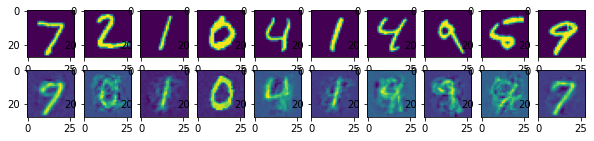

In [25]:
f, a = plt.subplots(2, 10, figsize=(10,2))
for i in range(examples_to_show):
  a[0][i].imshow(np.reshape(x_image_test[i], (28, 28)))
  a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))